In [30]:
# Setting path
import sys
import os
# getting the name of the directory where the this file is present.
current = os.path.abspath('')
# Getting the parent directory 
parent = os.path.dirname(current)
# adding the parent directory to
# the sys.path.
sys.path.append(os.path.dirname(parent))

In [31]:
#Importing important libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pickle
import holidays
import config

In [32]:
data_filename = 'firstsource_grtp_conjestion_data.pickle'

In [33]:
count_dict = pd.read_pickle(config.DATA+'//data//'+data_filename)

Text(0.5, 1.0, 'FirstSource_GRTP_GF hourly crowd plot')

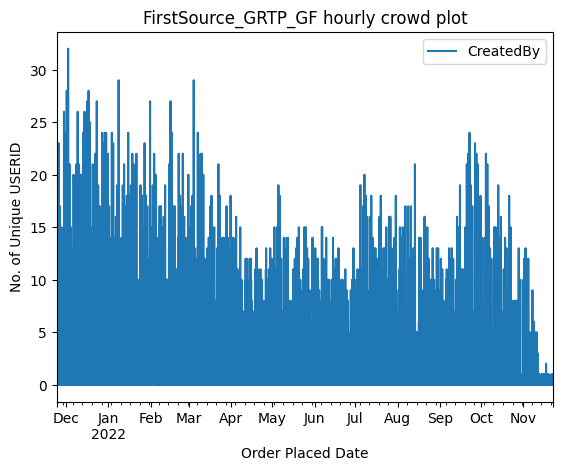

In [34]:
ax = count_dict.plot()
ax.set_xlabel('Order Placed Date')
ax.set_ylabel('No. of Unique USERID')
ax.set_title('FirstSource_GRTP_GF hourly crowd plot')

In [35]:
# a = 0
# for key in sorted_dict.keys():
#     count_dict[key].set_index('Order Placed Date_Time').plot(title = key, figsize=(5,5))
#     a += 1 
#     if a>30:
#         break

In [36]:
df_item_hourly = count_dict

## Resampling

In [37]:
# df_item_hourly = df_item.resample('H', on='Order Placed Date_Time').sum()
# df_item_daily = df_item.resample('D', on='Order Placed Date_Time').sum()

## Feature extraction

In [38]:
def date_features(dataset):
    if pd.infer_freq(dataset.index) == 'H':
        dataset['hour'] = dataset.index.hour
    dataset['date'] = dataset.index.day
    dataset['month'] = dataset.index.month
    #dataset['year'] = dataset.index.year
    dataset['dayofweek'] = dataset.index.dayofweek
    return dataset

In [39]:
# Adding date features
df_item_hourly_features = date_features(df_item_hourly)

In [40]:
# Add holidays and encoding as 0 and 1
df_item_hourly_features['holiday'] = pd.Series(df_item_hourly_features.index).apply(lambda x: holidays.CountryHoliday('IN',prov='KA').get(x)).values
df_item_hourly_features['holiday'] = df_item_hourly_features['holiday'].astype('bool').astype('int')

## Feature encoding

In [41]:
# Cyclic encoding function
def encode(dataset, col, max_val):
    dataset[col + '_sin'] = np.sin(2 * np.pi * dataset[col]/max_val)
    dataset[col + '_cos'] = np.cos(2 * np.pi * dataset[col]/max_val)
    dataset.drop(col,axis = 1, inplace = True)
    return dataset

In [42]:
# Encoding df
if pd.infer_freq(df_item_hourly_features.index) == 'H':
    df_item_hourly_features = encode(df_item_hourly_features,'hour',24)
df_item_hourly_features = encode(df_item_hourly_features,'date',31)
df_item_hourly_features = encode(df_item_hourly_features,'month',12)
df_item_hourly_features = encode(df_item_hourly_features,'dayofweek',7)

In [43]:
# # Encoding year as 0 and 1 
# df_item_hourly_features['year_enc'] = pd.get_dummies(df_item_hourly_features['year'])[2021]
# df_item_hourly_features.drop('year',axis = 1, inplace = True)

In [44]:
# Moving CreatedBy column at the end
df_item_hourly_features['CreatedBy'] = df_item_hourly_features.pop('CreatedBy')

In [45]:
# df_item= df_item.loc['2021-11-24 08:00:00': '2022-08-31 23:59:00']
# df_item_hourly_features.index[0]
# df_item_hourly_features[df_item_hourly_features['CreatedBy'] != 0].index[-1]

In [46]:
# Removing last zeros
df_item_hourly_features= df_item_hourly_features.loc[df_item_hourly_features.index[0]: df_item_hourly_features[df_item_hourly_features['CreatedBy'] != 0].index[-1]]

<AxesSubplot: xlabel='Order Placed Date_Time'>

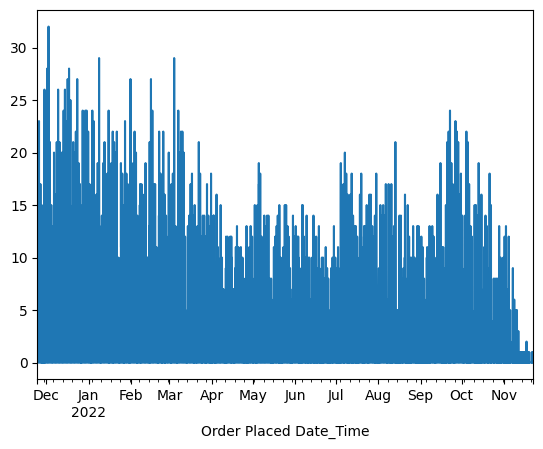

In [47]:
df_item_hourly_features['CreatedBy'].plot()

In [48]:
df_temp = df_item_hourly_features['CreatedBy'].resample('D').sum().to_frame()

<AxesSubplot: xlabel='Order Placed Date_Time'>

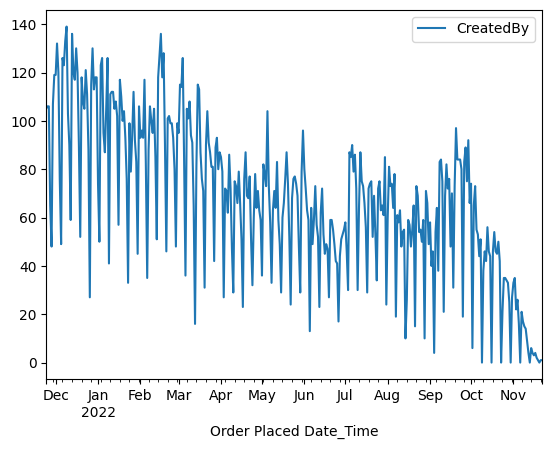

In [49]:
df_temp.plot()

Text(0.5, 1.0, 'Daily Sales Count')

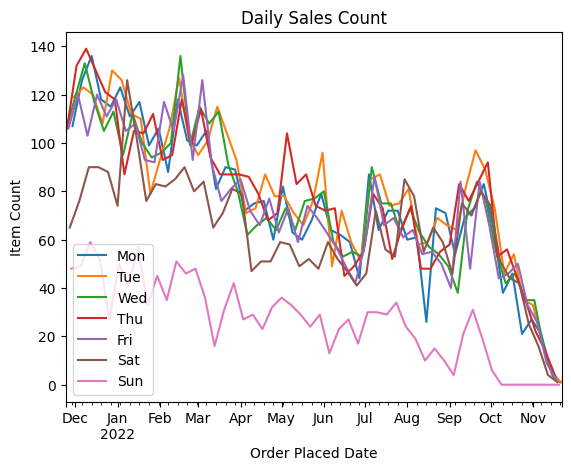

In [50]:
ax = df_temp[df_temp.index.dayofweek == 0]['CreatedBy'].plot()
df_temp[df_temp.index.dayofweek == 1]['CreatedBy'].plot(ax=ax)
df_temp[df_temp.index.dayofweek == 2]['CreatedBy'].plot(ax=ax)
df_temp[df_temp.index.dayofweek == 3]['CreatedBy'].plot(ax=ax)
df_temp[df_temp.index.dayofweek == 4]['CreatedBy'].plot(ax=ax)
df_temp[df_temp.index.dayofweek == 5]['CreatedBy'].plot(ax=ax)
df_temp[df_temp.index.dayofweek == 6]['CreatedBy'].plot(ax=ax)
ax.legend(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
ax.set_xlabel('Order Placed Date')
ax.set_ylabel('Item Count')
ax.set_title('Daily Sales Count')

In [51]:
#df_item_hourly_features.drop(df_item_hourly_features[df_item_hourly_features.index == np.datetime64("2022-08-09")].index, axis = 0, inplace=True)

In [52]:
df_temp[df_temp['CreatedBy'] == 0]

,CreatedBy
Order Placed Date_Time,
2022-10-09,0
2022-10-16,0
2022-10-23,0
2022-10-30,0
2022-11-06,0
2022-11-13,0
2022-11-20,0


<AxesSubplot: xlabel='Order Placed Date_Time'>

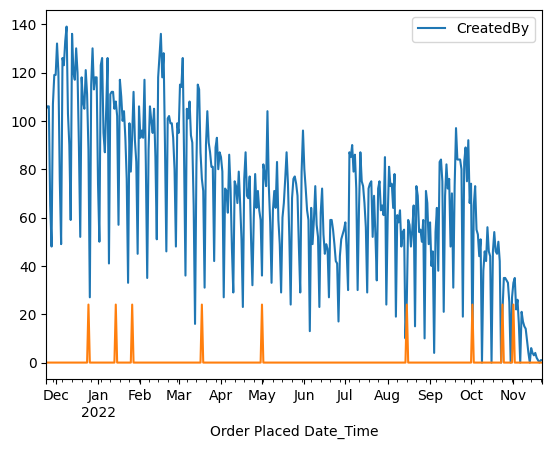

In [53]:
df_temp.plot()
df_item_hourly_features['holiday'].resample('D').sum().plot()

In [54]:
df_temp[df_temp.index.date == np.datetime64("2022-08-15")]

,CreatedBy
Order Placed Date_Time,
2022-08-15,26


In [55]:
#df_item_hourly_features[df_item_hourly_features.index.date == np.datetime64("2022-08-15")]['CreatedBy'].to_frame()

In [56]:
df_item_hourly_features[df_item_hourly_features.index == np.datetime64("2022-08-31")]['CreatedBy']

Order Placed Date_Time
2022-08-31    0
Freq: H, Name: CreatedBy, dtype: int64

In [57]:
df_item_hourly_features.loc[df_item_hourly_features.index == np.datetime64("2022-08-31"),'CreatedBy'] = 330

In [58]:
df_item_hourly_features.loc[df_item_hourly_features['holiday'] == 1,'CreatedBy'] = 0

<AxesSubplot: xlabel='Order Placed Date_Time'>

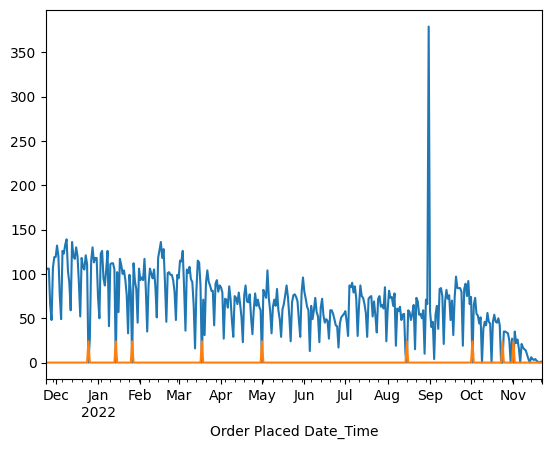

In [59]:
df_item_hourly_features['CreatedBy'].resample('D').sum().plot()
df_item_hourly_features['holiday'].resample('D').sum().plot()

In [60]:
#df_item_hourly_features = df_item_hourly_features[df_item_hourly_features.index.dayofweek< 5]

In [61]:
#df_item_hourly_features.loc[df_item_hourly_features.index.dayofweek == 6, 'CreatedBy' ] = df_item_hourly_features_filter.resample('W').mean().to_frame()

## Model building

In [62]:
df_item_hourly_features

,holiday,hour_sin,hour_cos,date_sin,date_cos,month_sin,month_cos,dayofweek_sin,dayofweek_cos,CreatedBy
Order Placed Date_Time,,,,,,,,,,
2021-11-24 08:00:00,0,8.660254e-01,-0.500000,-0.988468,0.151428,-0.5,0.866025,0.974928,-0.222521,2
2021-11-24 09:00:00,0,7.071068e-01,-0.707107,-0.988468,0.151428,-0.5,0.866025,0.974928,-0.222521,16
2021-11-24 10:00:00,0,5.000000e-01,-0.866025,-0.988468,0.151428,-0.5,0.866025,0.974928,-0.222521,8
2021-11-24 11:00:00,0,2.588190e-01,-0.965926,-0.988468,0.151428,-0.5,0.866025,0.974928,-0.222521,8
2021-11-24 12:00:00,0,1.224647e-16,-1.000000,-0.988468,0.151428,-0.5,0.866025,0.974928,-0.222521,7
...,...,...,...,...,...,...,...,...,...,...
2022-11-22 10:00:00,0,5.000000e-01,-0.866025,-0.968077,-0.250653,-0.5,0.866025,0.781831,0.623490,0
2022-11-22 11:00:00,0,2.588190e-01,-0.965926,-0.968077,-0.250653,-0.5,0.866025,0.781831,0.623490,0
2022-11-22 12:00:00,0,1.224647e-16,-1.000000,-0.968077,-0.250653,-0.5,0.866025,0.781831,0.623490,0


In [63]:
#Assigning X and y variables
X = df_item_hourly_features.iloc[:,0:-1]
y = df_item_hourly_features.iloc[:,-1]


In [64]:
X

,holiday,hour_sin,hour_cos,date_sin,date_cos,month_sin,month_cos,dayofweek_sin,dayofweek_cos
Order Placed Date_Time,,,,,,,,,
2021-11-24 08:00:00,0,8.660254e-01,-0.500000,-0.988468,0.151428,-0.5,0.866025,0.974928,-0.222521
2021-11-24 09:00:00,0,7.071068e-01,-0.707107,-0.988468,0.151428,-0.5,0.866025,0.974928,-0.222521
2021-11-24 10:00:00,0,5.000000e-01,-0.866025,-0.988468,0.151428,-0.5,0.866025,0.974928,-0.222521
2021-11-24 11:00:00,0,2.588190e-01,-0.965926,-0.988468,0.151428,-0.5,0.866025,0.974928,-0.222521
2021-11-24 12:00:00,0,1.224647e-16,-1.000000,-0.988468,0.151428,-0.5,0.866025,0.974928,-0.222521
...,...,...,...,...,...,...,...,...,...
2022-11-22 10:00:00,0,5.000000e-01,-0.866025,-0.968077,-0.250653,-0.5,0.866025,0.781831,0.623490
2022-11-22 11:00:00,0,2.588190e-01,-0.965926,-0.968077,-0.250653,-0.5,0.866025,0.781831,0.623490
2022-11-22 12:00:00,0,1.224647e-16,-1.000000,-0.968077,-0.250653,-0.5,0.866025,0.781831,0.623490


In [65]:
y

Order Placed Date_Time
2021-11-24 08:00:00     2
2021-11-24 09:00:00    16
2021-11-24 10:00:00     8
2021-11-24 11:00:00     8
2021-11-24 12:00:00     7
                       ..
2022-11-22 10:00:00     0
2022-11-22 11:00:00     0
2022-11-22 12:00:00     0
2022-11-22 13:00:00     0
2022-11-22 14:00:00     1
Freq: H, Name: CreatedBy, Length: 8719, dtype: int64

In [66]:
from sklearn.model_selection import cross_validate
def evaluate(model, X, y, cv):
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error","r2","neg_mean_absolute_percentage_error"],
    )
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    r2 = cv_results["test_r2"]
    mape = -cv_results["test_neg_mean_absolute_percentage_error"]*100
    # print(
    #     f"Model: {model}\n"
    #     f"R Squared Error: {r2.mean():.3f} +/- {r2.std():.3f}\n"
    #     # f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
    #     # f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}\n"
    #     # f"MAPE: {mape.mean():.3f} +/- {mape.std():.3f}"
    # )
    return r2.mean()

In [67]:
from sklearn.model_selection import TimeSeriesSplit

ts_cv = TimeSeriesSplit(
    n_splits=5,
    gap=0,
    # max_train_size=10000,
    # test_size=1000,
) 

In [ ]:
linear_metric = {}

In [ ]:
from sklearn import linear_model as lm
linear_metric['LinearRegression']  = evaluate(lm.LinearRegression(), X, y, cv=5)
linear_metric['LinearRegression_ts'] = evaluate(lm.LinearRegression(), X, y, cv=ts_cv)
linear_metric['Ridge'] = evaluate(lm.Ridge(), X, y, cv=5)
linear_metric['Ridge_ts'] = evaluate(lm.Ridge(), X, y, cv=ts_cv)
linear_metric['Ridge_0.5'] = evaluate(lm.Ridge(alpha=.5), X, y, cv=5)
linear_metric['Ridge_0.5_ts'] = evaluate(lm.Ridge(alpha=.5), X, y, cv=ts_cv)
linear_metric['Lasso'] = evaluate(lm.Lasso(), X, y, cv=5)
linear_metric['Lasso_ts'] = evaluate(lm.Lasso(), X, y, cv=ts_cv)
linear_metric['Lasso_0.1'] = evaluate(lm.Lasso(alpha=.1), X, y, cv=5)
linear_metric['Lasso_0.1_ts'] = evaluate(lm.Lasso(alpha=.1), X, y, cv=ts_cv)
linear_metric['ElasticNet'] = evaluate(lm.ElasticNet(random_state=0), X, y, cv=5)
linear_metric['ElasticNet_ts'] = evaluate(lm.ElasticNet(random_state=0), X, y, cv=ts_cv)
linear_metric['BayesianRidge'] = evaluate(lm.BayesianRidge(), X, y, cv=5)
linear_metric['BayesianRidge_ts'] = evaluate(lm.BayesianRidge(), X, y, cv=ts_cv)
linear_metric['SGDRegressorts'] = evaluate(lm.SGDRegressor(max_iter=1000, tol=1e-3), X, y, cv=5)
linear_metric['SGDRegressor_ts'] = evaluate(lm.SGDRegressor(max_iter=1000, tol=1e-3), X, y, cv=ts_cv)

In [ ]:
linear_metric_df = pd.DataFrame(list(linear_metric.items()))

In [68]:
from sklearn import ensemble as sk_en
from xgboost.sklearn import XGBRegressor

In [70]:
boosting_metric ={}

In [71]:
boosting_metric['GradientBoosting'] = evaluate(sk_en.GradientBoostingRegressor(), X, y, cv=5)
boosting_metric['GradientBoosting_ts'] = evaluate(sk_en.GradientBoostingRegressor(), X, y, cv=ts_cv)
# boosting_metric['XGBoost'] = evaluate(XGBRegressor(), X, y, cv=5)
# boosting_metric['XGBoost_ts'] = evaluate(XGBRegressor(), X, y, cv=ts_cv)
# boosting_metric['HistGradientBoosting'] = evaluate(sk_en.HistGradientBoostingRegressor(), X, y, cv=5)
# boosting_metric['HistGradientBoosting_ts'] = evaluate(sk_en.HistGradientBoostingRegressor(), X, y, cv=ts_cv)
# boosting_metric['AdaBoost'] = evaluate(sk_en.AdaBoostRegressor(), X, y, cv=5)
# boosting_metric['AdaBoost_ts'] = evaluate(sk_en.AdaBoostRegressor(), X, y, cv=ts_cv)
# boosting_metric['RandomForest'] = evaluate(sk_en.RandomForestRegressor(), X, y, cv=5)
# boosting_metric['RandomForest_ts'] = evaluate(sk_en.RandomForestRegressor(), X, y, cv=ts_cv)

In [72]:
boosting_metric_df = pd.DataFrame(list(boosting_metric.items()))

In [73]:
boosting_metric_df

,0,1
0,GradientBoosting,0.109530
1,GradientBoosting_ts,0.272766


In [74]:
boosting_metric_df.sort_values(ascending = False, by = 1)

,0,1
1,GradientBoosting_ts,0.272766
0,GradientBoosting,0.109530


In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
nn_metric = {}

In [ ]:
mlpr = MLPRegressor(
        hidden_layer_sizes=(30, 15),
        learning_rate_init=0.01,
        early_stopping=True,
        random_state=0,
    )

In [ ]:
nn_metric['mlp'] = evaluate(mlpr, X, y, cv=5)
nn_metric['mlp_ts'] = evaluate(mlpr, X, y, cv=ts_cv)

In [ ]:
nn_metric_df = pd.DataFrame(list(nn_metric.items()))

In [ ]:
# model_metric_df = pd.concat([linear_metric_df,boosting_metric_df,nn_metric_df])
# model_metric_df.columns = ['Model', 'Metric']
# model_metric_df.sort_values(ascending=False, by = 'Metric').to_csv(config.DATA+'//'+'model_metric.csv', index=False)

In [ ]:
all_splits = list(ts_cv.split(X, y))
train_0, test_0 = all_splits[1]

In [ ]:
X_train, y_train = X.iloc[train_0], y.iloc[train_0]
X_test, y_test = X.iloc[test_0], y.iloc[test_0]

In [ ]:
X_train, y_train = X,y
X_test, y_test = X,y

In [ ]:
gbr = sk_en.GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
y_pred = gbr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error
print('r2_score: {}'.format(r2_score(y_test, y_pred)))
# print('mae: {}'.format(mean_absolute_error(y_test, y_pred)))
# print('mape: {}'.format(mean_absolute_percentage_error(y_test, y_pred)))

r2_score: 0.9014538011575453


In [ ]:
demand_df = y_test.to_frame()
demand_df['CreatedBy Model'] = y_pred

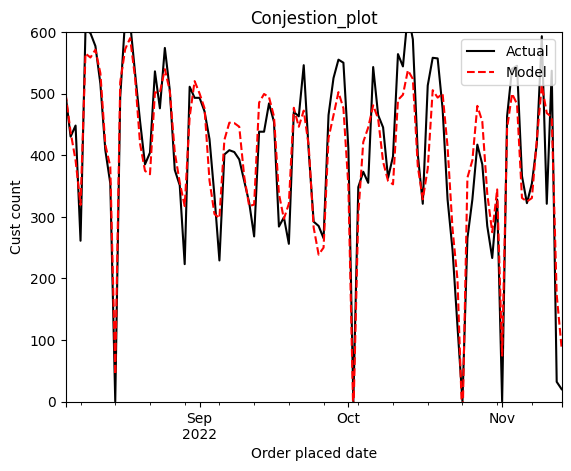

In [ ]:
fig, ax = plt.subplots()
cycler = plt.cycler(linestyle=['-', '--',], color=['black', 'red'])
ax.set_prop_cycle(cycler)
demand_df.resample('D').sum().plot(ax=ax)
plt.ylabel('Cust count')
plt.xlabel('Order placed date')
plt.title('Conjestion_plot')
plt.ylim(0,600)
plt.legend(['Actual', 'Model'], loc = 1)

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
        #'subsample': [0.1,0.3,0.6, 0.8, 1.0],
        'max_depth': [3,5,8,10],
        'learning_rate': [0.001,0.01,0.1,1,10],
        #'min_child_weight': [1,2,5,10],
        'n_estimators':[10,20,50,100,150,200],       
        }

In [ ]:
grid_search = GridSearchCV(estimator=gbr, 
                           param_grid=params, 
                           cv=ts_cv, n_jobs=-1, verbose=1, scoring = "r2")

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'max_depth': [3, 5, 8, 10],
                         'n_estimators': [10, 20, 50, 100, 150, 200]},
             scoring='r2', verbose=1)

In [ ]:
gbr_best = grid_search.best_estimator_
gbr_best

GradientBoostingRegressor(n_estimators=20)

In [ ]:
y_pred_best = gbr_best.predict(X_test)

In [ ]:
print('r2_score: {}'.format(r2_score(y_test, y_pred_best)))

r2_score: 0.5954684333325204
